<a href="https://colab.research.google.com/github/subah2004/Handwritten-digits-recognition-/blob/Pramod-Katchalla/HandWritten_digit_recognition_all_models_merging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

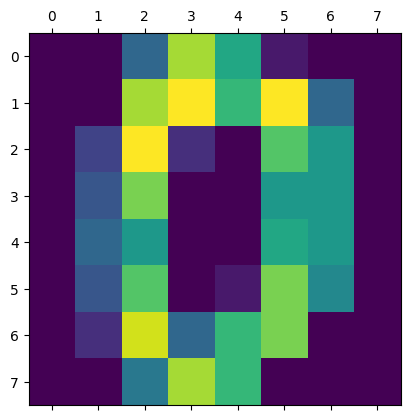

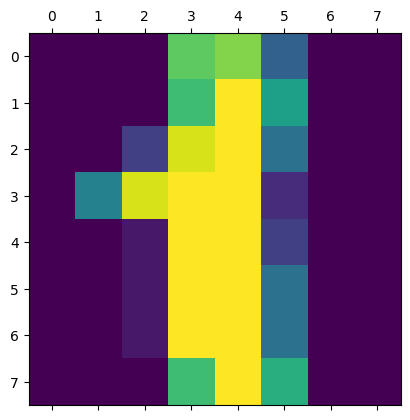

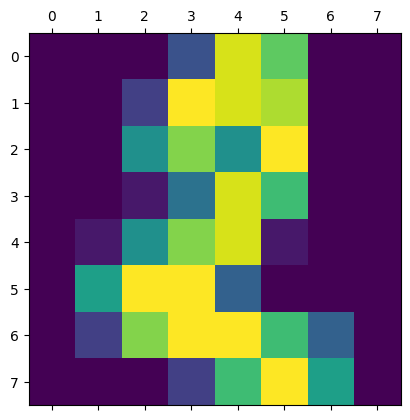

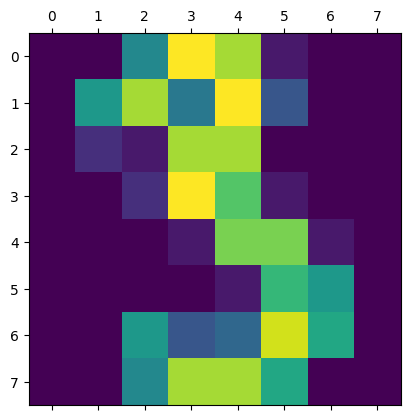

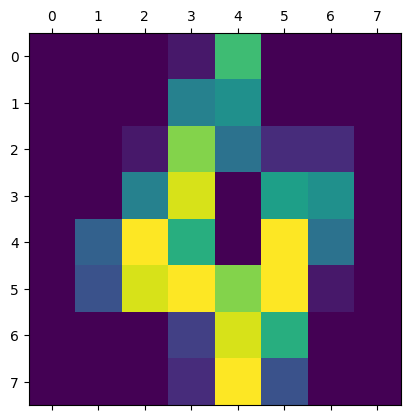

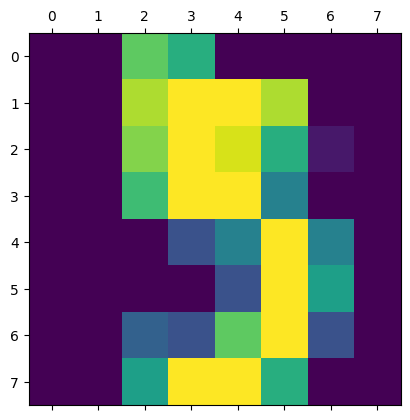

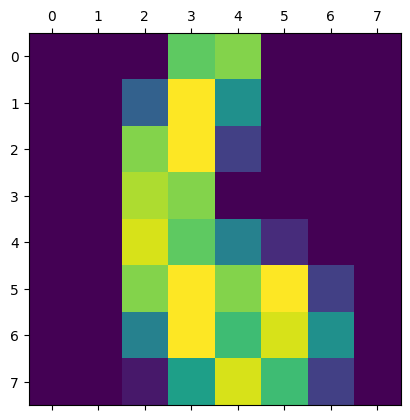

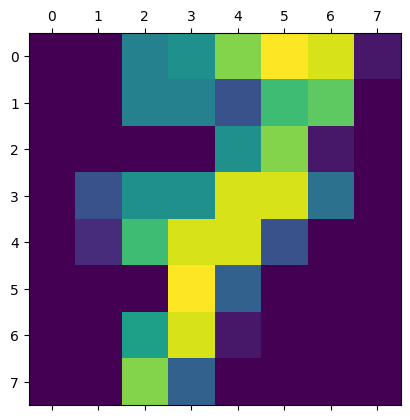

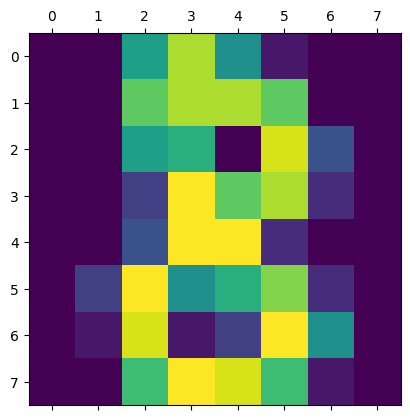

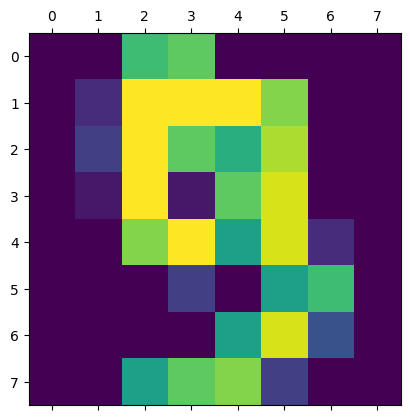

In [ ]:
for i in range(10):
    plt.matshow(digits.images[i])

In [ ]:
df = pd.DataFrame(digits.data)


In [ ]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
X = df.drop('target',axis=1)
y = df.target

###splitting into train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

###random forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

###Evaluating the model

In [ ]:
y_pred = rfc.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score,f1_score
print("Accuracy Score {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy Score 98.33%


In [ ]:
print("F1 Score:",f1_score(y_test,y_pred,average='weighted'))

F1 Score: 0.9832280980708925


In [ ]:
test = df.iloc[2]
test1 = test[0:64]
test1

,2
0,0.0
1,0.0
2,0.0
3,4.0
4,15.0
...,...
59,3.0
60,11.0
61,16.0
62,9.0


In [ ]:
rfc.predict([test1])

array([2])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

ModuleNotFoundError: No module named 'keras.utils.np_utils'

In [ ]:
pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [ ]:
from tensorflow.keras.utils import to_categorical


ImportError: cannot import name '_saturate_cast' from 'keras.src.ops.core' (/usr/local/lib/python3.10/dist-packages/keras/src/ops/core.py)

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]          #stores image as data

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
digits.target[0]

0

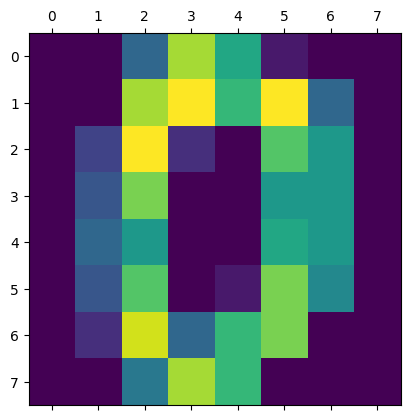

In [ ]:
plt.matshow(digits.images[0])

<Figure size 640x480 with 0 Axes>

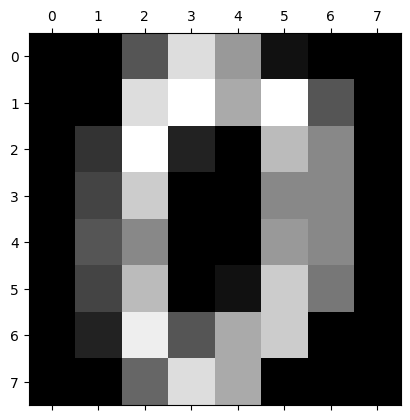

In [ ]:
plt.gray()
plt.matshow(digits.images[0])

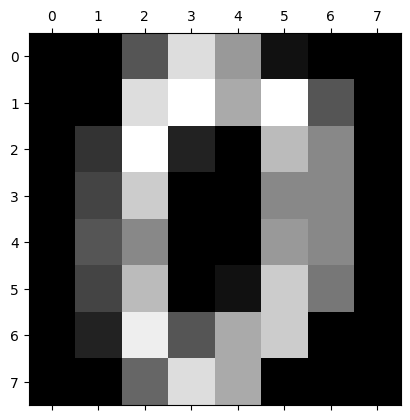

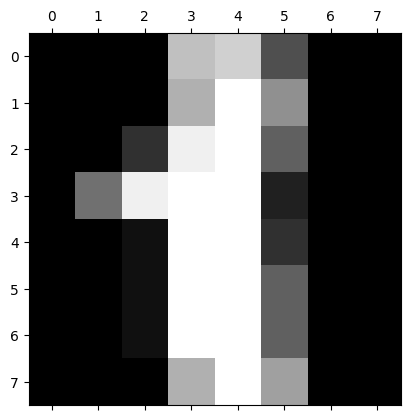

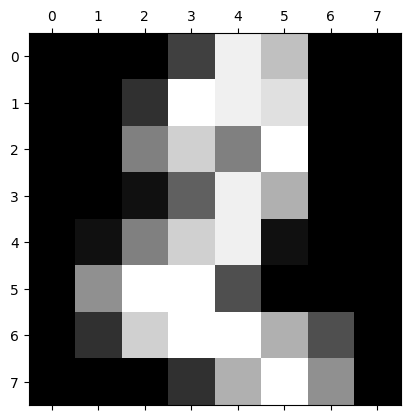

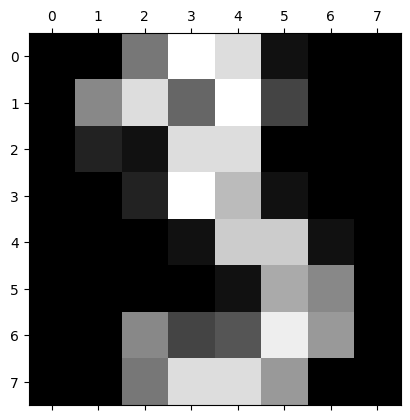

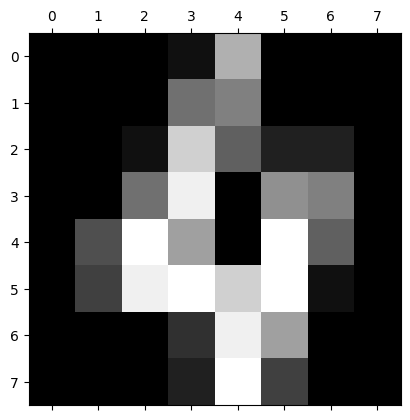

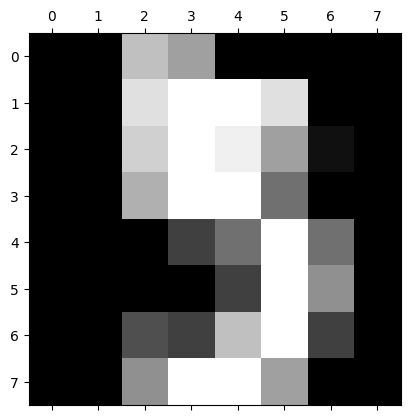

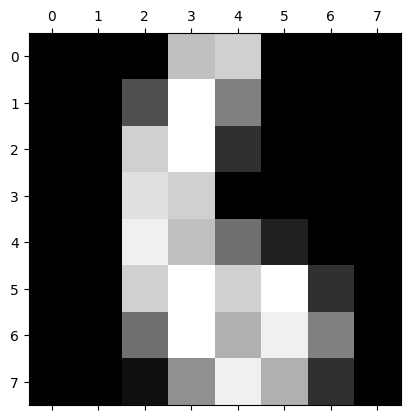

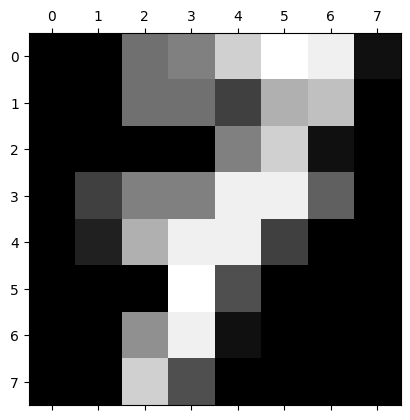

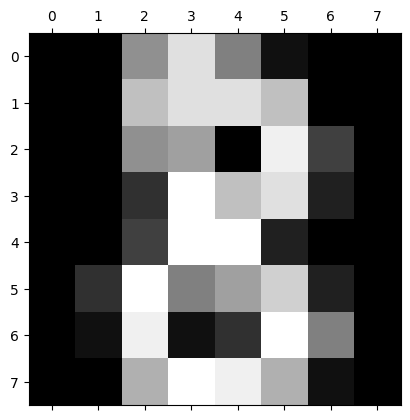

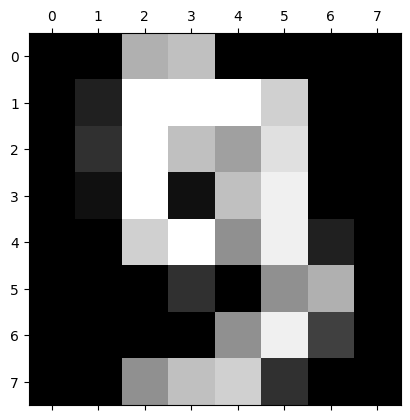

In [ ]:
for i in range(10):
 plt.matshow(digits.images[i])

In [ ]:
digits.target[0:3]


array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(digits.data, digits.target, random_state=10, test_size=0.3 )


In [ ]:
len(X_train)

1257

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
LinearRegression()


LinearRegression()

In [ ]:
model.score(X_test,y_test)

0.5586943023753009

In [ ]:
model.predict([digits.data[50]])

array([2.92807612])

In [ ]:
digits.target[50]

2

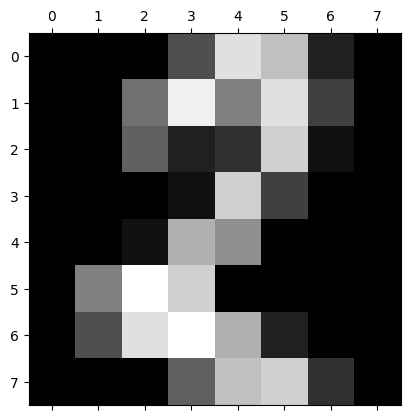

In [ ]:
plt.matshow(digits.images[50])

In [ ]:
model.predict(digits.data[0:5])


array([2.49780299, 1.14179396, 2.0620021 , 2.97612728, 4.41864324])

Random Forest

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [ ]:
digits=load_digits()


In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
digits.feature_names


['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
digits.frame

In [ ]:
digits.DESCR


".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 1797\n:Number of Attributes: 64\n:Attribute Information: 8x8 image of integer pixels in the range 0..16.\n:Missing Attribute Values: None\n:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n:Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each bl

In [ ]:
digits.images[5]

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

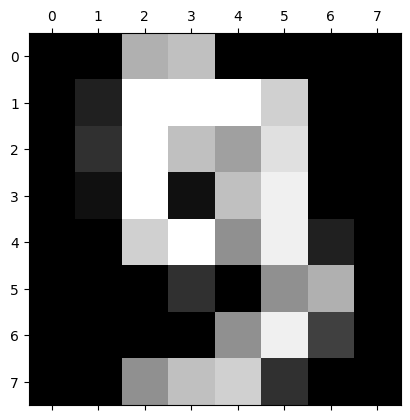

In [ ]:
plt.matshow(digits.images[9])


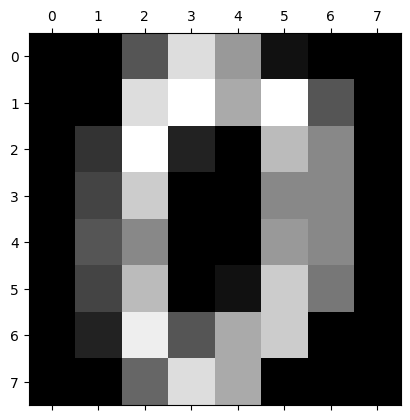

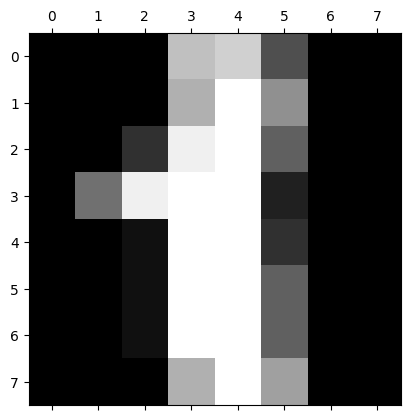

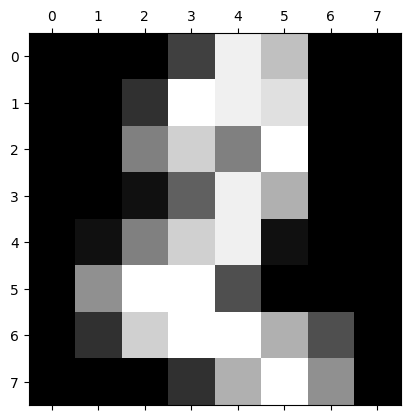

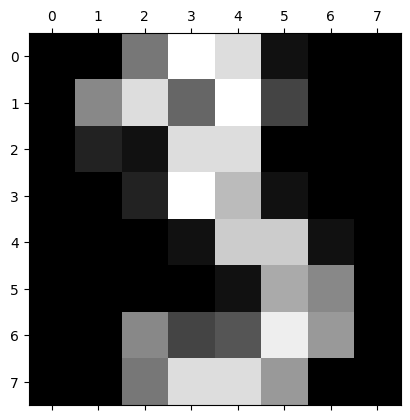

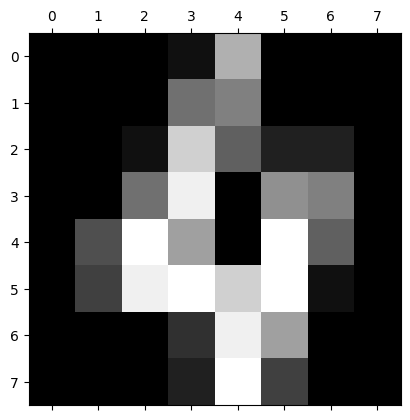

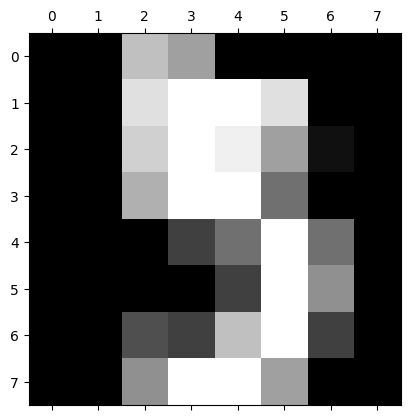

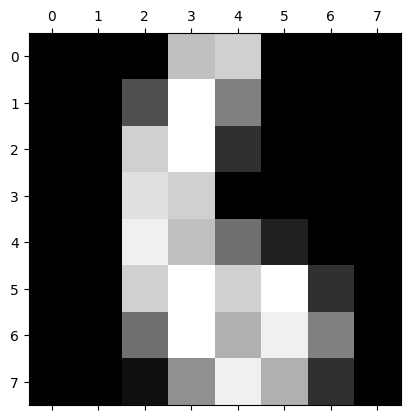

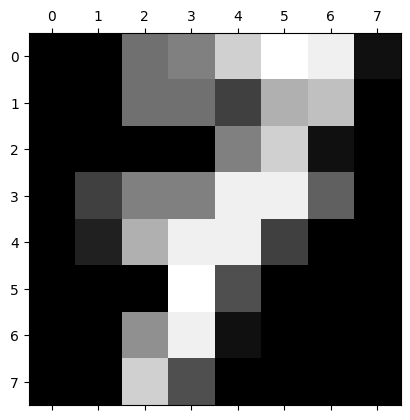

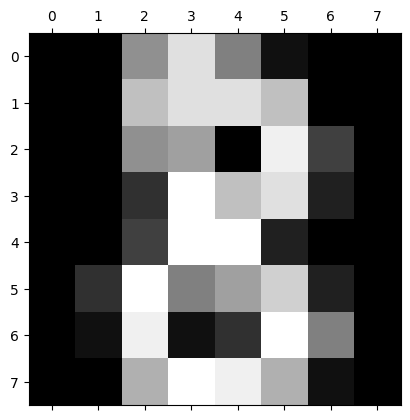

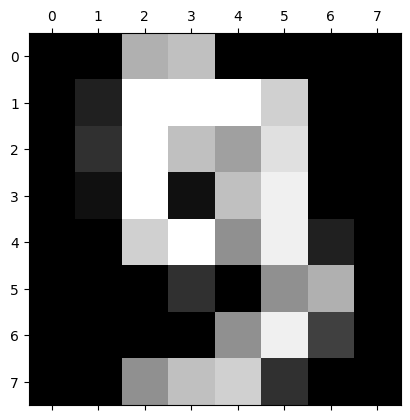

In [ ]:
for i in range(10):
  plt.matshow(digits.images[i])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(digits.data, digits.target, random_state=10, test_size=0.2 )


In [ ]:
len(X_train)

1437

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=  RandomForestClassifier(n_estimators =  50) #No.  of decision Trees inc--> accuracy increases
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
model.score(X_test,y_test)


0.9583333333333334

In [ ]:
model.predict(digits.data[[4]])    # 2D arrays


array([4])

In [ ]:
model.predict(digits.data[0:4])


array([0, 1, 2, 3])

In [ ]:
y_predicted = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  1],
       [ 0,  1,  1,  1,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  1,  0, 35]])

Text(95.72222222222221, 0.5, 'Truth')

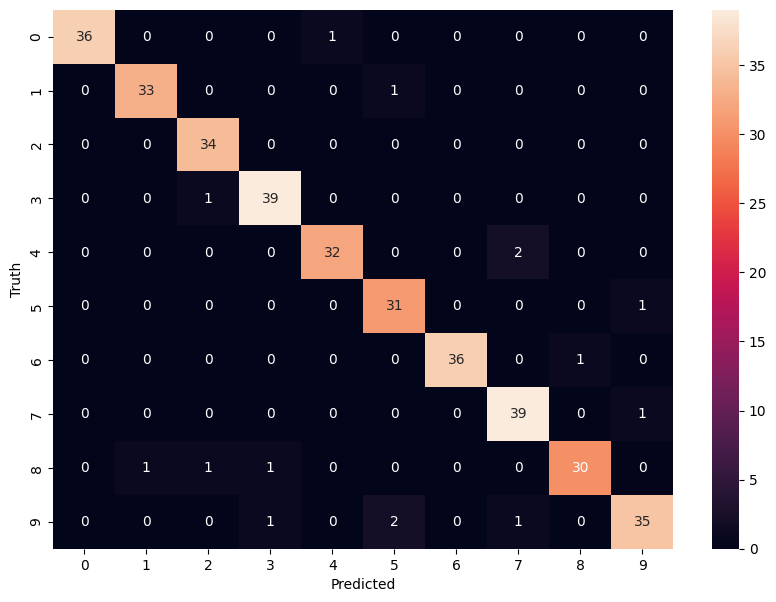

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

#new one

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.metrics import f1_score

In [ ]:
#used for confusion matrix
from sklearn import metrics

In [ ]:
digits = load_digits()


In [ ]:
digits.data.shape


(1797, 64)

In [ ]:
digits.target.shape


(1797,)

##Show Images and Labels


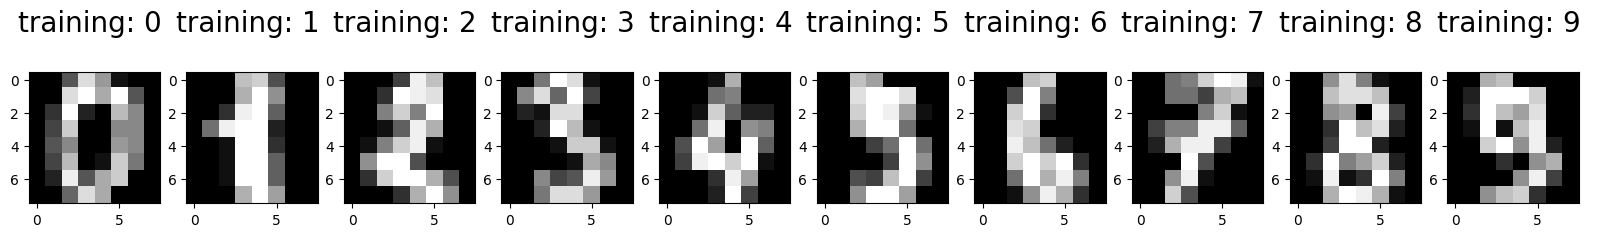

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('training: %i \n' % label, fontsize = 20)

In [ ]:
#test_size: what proportion of original date is used for test set
x_train, x_test, y_train, y_test = train_test_split(
digits.data, digits.target, test_size = 0.20, random_state = 0)

In [ ]:
print(x_train.shape)

(1437, 64)


In [ ]:
print(y_train.shape)

(1437,)


In [ ]:
print(x_test.shape)

(360, 64)


In [ ]:
print(y_test.shape)

(360,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [ ]:
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
rfc.score(x_test,y_test)

0.9722222222222222

In [ ]:
print(rfc.score(x_test,y_test))
print(f1_score(y_test,rfc.predict(x_test),average='macro'))

0.9722222222222222
0.9727790182579351


Text(0, 0.5, 'Prediction Accuracy')

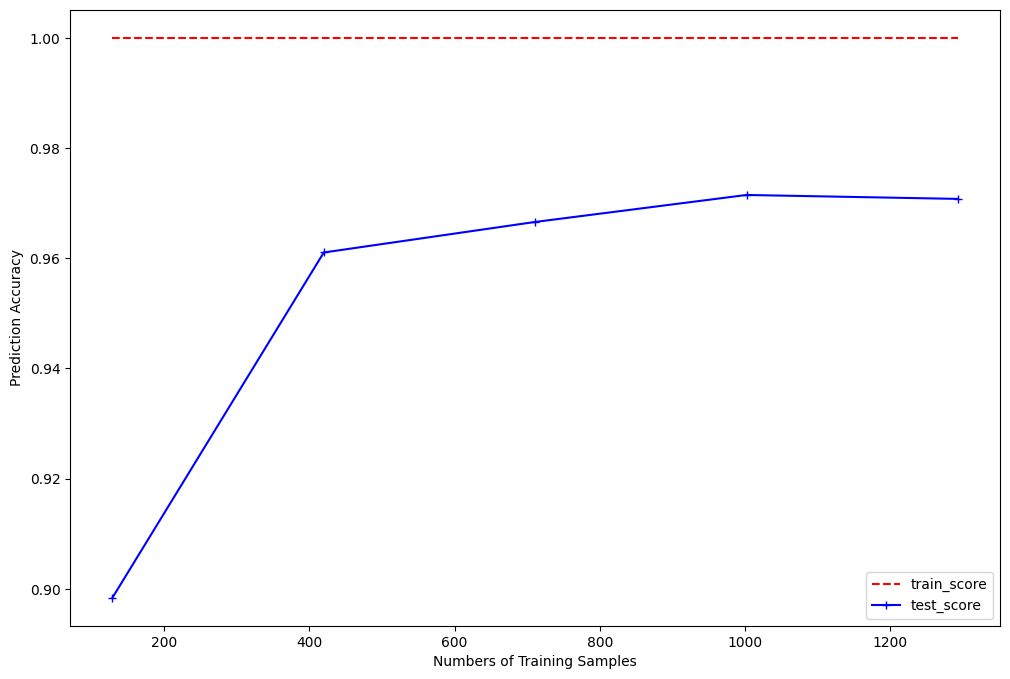

In [ ]:
lc=learning_curve(rfc,x_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score, "r--" ,label="train_score")
plt.plot(size,test_score,"b+-" , label="test_score")
plt.legend(loc="best")
plt.xlabel("Numbers of Training Samples")
plt.ylabel("Prediction Accuracy")

Text(0, 0.5, 'Performance metric')

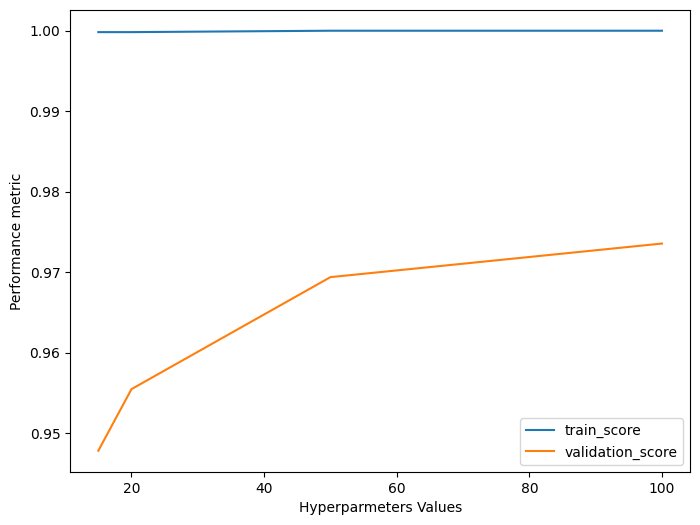

In [ ]:
param_range=[15, 20,50,100]
curve=validation_curve(rfc,x_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score, label="train_score")
plt.plot(param_range,test_score, label="validation_score")
plt.legend(loc="best")
plt.xticks=param_range
plt.xlabel("Hyperparmeters Values")
plt.ylabel("Performance metric")

In [ ]:
rfc.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 51,
 'verbose': 0,
 'warm_start': False}

###BreadcrumbsMNIST-Classification-Project-Thesis
/MNIST Classification project.ipynb

In [ ]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [ ]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [ ]:
grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
146 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                              random_state=51),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'max_features': [2, 4, 6, 'auto'],
                         'max_leaf_nodes': [2, 3, None]})

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.95      1.00      0.97        35
           2       1.00      0.94      0.97        36
           3       0.97      1.00      0.98        29
           4       1.00      0.97      0.98        30
           5       0.95      0.95      0.95        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.92      0.96        39
           9       0.95      0.95      0.95        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



##logistic regression

In [ ]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial', n_jobs=-1,random_state=51)


In [ ]:
logreg.fit(x_train,y_train)
pred=logreg.predict(x_test)
logreg.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9583333333333334

In [ ]:
print(logreg.score(x_test,y_test))
print(f1_score(y_test,logreg.predict(x_test),average='macro'))

0.9583333333333334
0.9602082366346595


Text(0, 0.5, 'Prediction Accuracy')

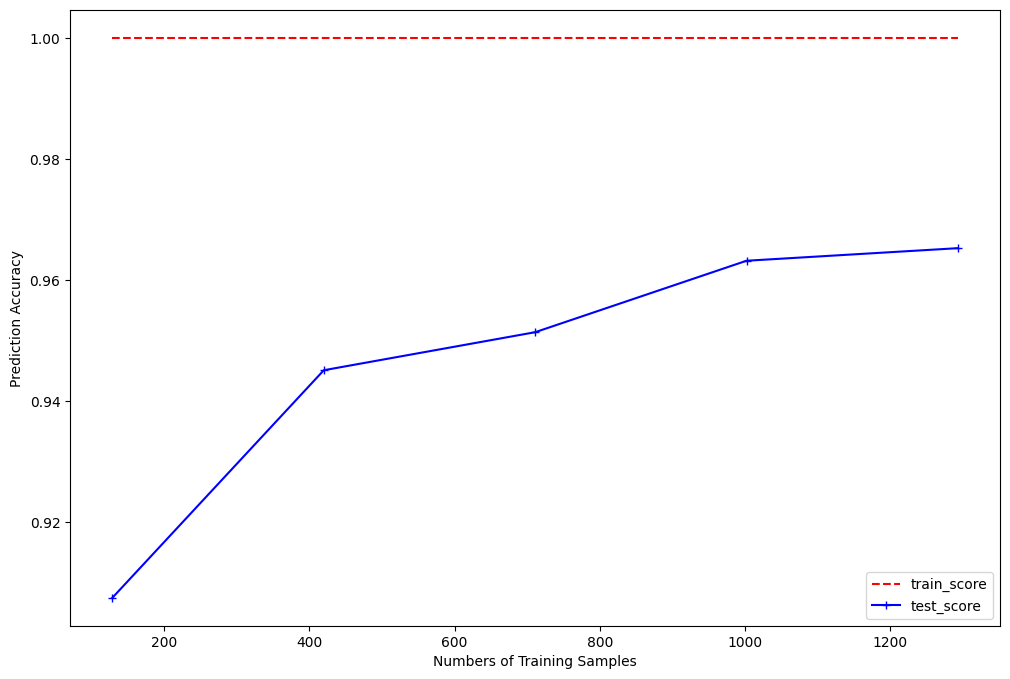

In [ ]:
lc=learning_curve(logreg,x_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score, "r--" ,label="train_score")
plt.plot(size,test_score,"b+-" , label="test_score")
plt.legend(loc="best")
plt.xlabel("Numbers of Training Samples")
plt.ylabel("Prediction Accuracy")

In [ ]:
curve

(array([[1.        , 1.        , 1.        , 1.        , 0.99913043],
        [0.99912968, 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]]),
 array([[0.95138889, 0.92708333, 0.96864111, 0.93728223, 0.95470383],
        [0.95833333, 0.9375    , 0.97212544, 0.94773519, 0.96167247],
        [0.97222222, 0.95833333, 0.97212544, 0.96167247, 0.9825784 ],
        [0.98263889, 0.96180556, 0.98606272, 0.95818815, 0.97909408]]))

Text(0, 0.5, 'Performance metric')

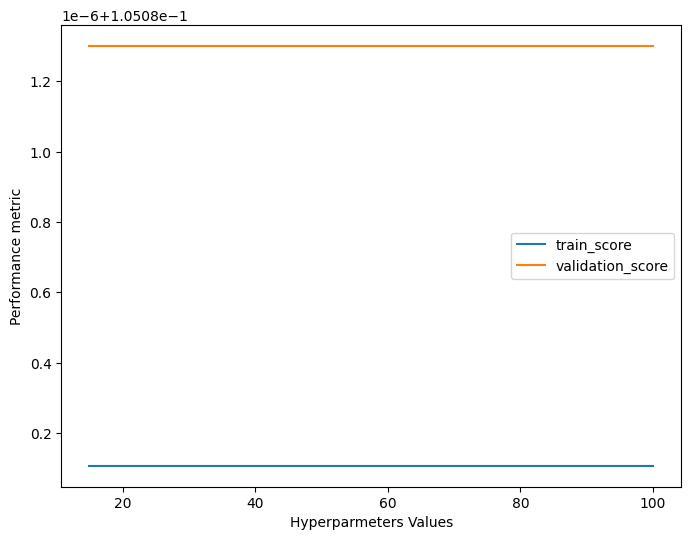

In [ ]:
param_range=[15,20,25,50,100]
curve=validation_curve(logreg,x_train,y_train,cv=5,param_name='tol',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score, label="train_score")
plt.plot(param_range,test_score, label="validation_score")
plt.legend(loc="best")
plt.xticks=param_range
plt.xlabel("Hyperparmeters Values")
plt.ylabel("Performance metric")

In [ ]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 51,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid={'C':[0.01,0.1,3,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}

In [ ]:
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)


In [ ]:
grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 3, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']})

In [ ]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.89      0.90        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      1.00      0.98        30
           5       0.97      0.93      0.95        40
           6       0.98      0.98      0.98        44
           7       1.00      0.97      0.99        39
           8       0.92      0.92      0.92        39
           9       0.91      0.95      0.93        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



##knn classifier

In [ ]:
knn=KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
knn.score(x_test,y_test)

0.975

In [ ]:
print(knn.score(x_test,y_test))
print(f1_score(y_test,knn.predict(x_test),average='macro'))

0.975
0.9750733248981561


Text(0, 0.5, 'Prediction Accuracy')

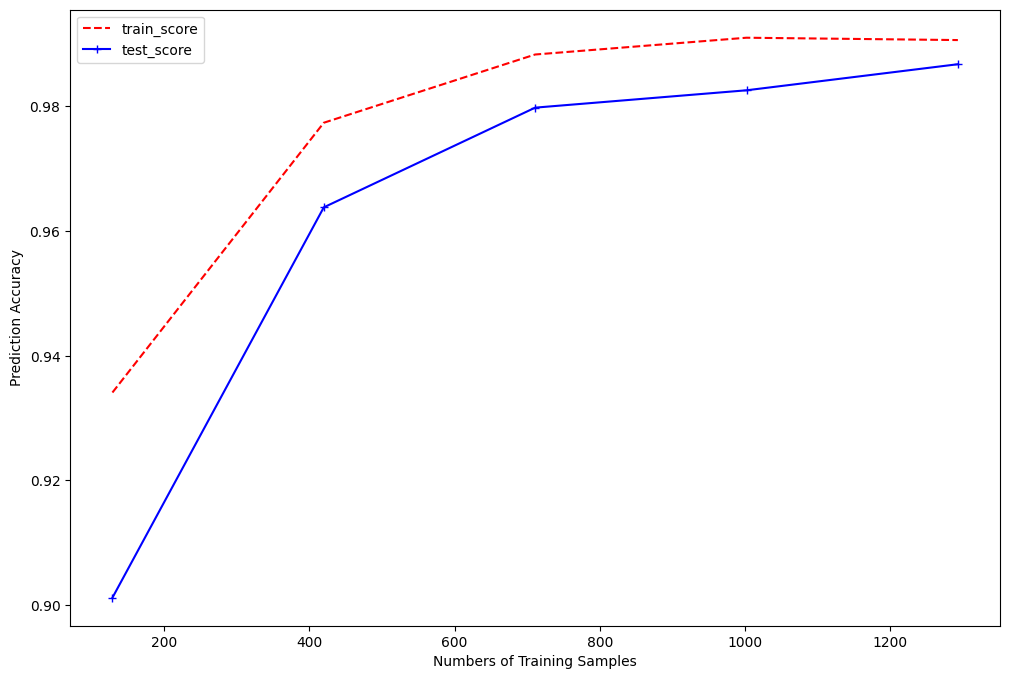

In [ ]:
lc=learning_curve(knn,x_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score, "r--" ,label="train_score")
plt.plot(size,test_score,"b+-" , label="test_score")
plt.legend(loc="best")
plt.xlabel("Numbers of Training Samples")
plt.ylabel("Prediction Accuracy")

In [ ]:
curve

(array([[0.10530896, 0.10530896, 0.10521739, 0.10521739, 0.10434783],
        [0.10530896, 0.10530896, 0.10521739, 0.10521739, 0.10434783],
        [0.10530896, 0.10530896, 0.10521739, 0.10521739, 0.10434783],
        [0.10530896, 0.10530896, 0.10521739, 0.10521739, 0.10434783],
        [0.10530896, 0.10530896, 0.10521739, 0.10521739, 0.10434783]]),
 array([[0.10416667, 0.10416667, 0.10452962, 0.10452962, 0.10801394],
        [0.10416667, 0.10416667, 0.10452962, 0.10452962, 0.10801394],
        [0.10416667, 0.10416667, 0.10452962, 0.10452962, 0.10801394],
        [0.10416667, 0.10416667, 0.10452962, 0.10452962, 0.10801394],
        [0.10416667, 0.10416667, 0.10452962, 0.10452962, 0.10801394]]))

Text(0, 0.5, 'Performance metric')

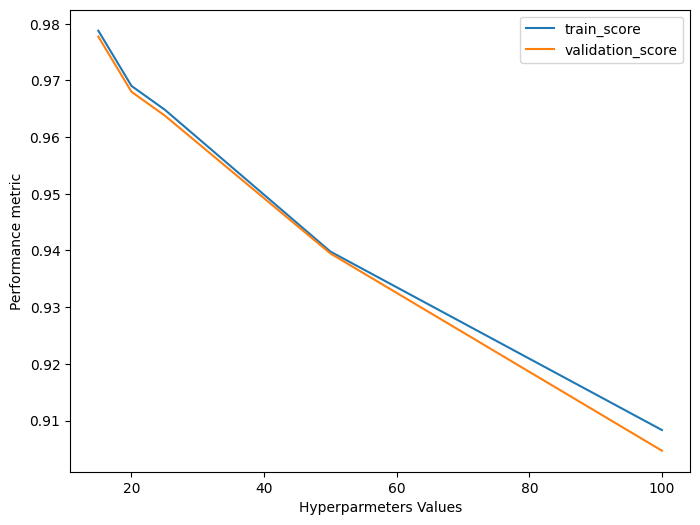

In [ ]:
param_range=[15,20,25,50,100]
curve=validation_curve(knn,x_train,y_train,cv=5,param_name='n_neighbors',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score, label="train_score")
plt.plot(param_range,test_score, label="validation_score")
plt.legend(loc="best")
plt.xticks=param_range
plt.xlabel("Hyperparmeters Values")
plt.ylabel("Performance metric")

In [ ]:
param_grid={'algorithm':['auto'],
'leaf_size':[30],
'metric':['minkowski'],
'metric_params':[None],
'n_jobs':[None],
'n_neighbors':[5],
'p':[2],
'weights':['uniform']}

In [ ]:
grid=GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=50,n_jobs=-1),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [ ]:
grid.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=50),
             n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [30],
                         'metric': ['minkowski'], 'metric_params': [None],
                         'n_jobs': [None], 'n_neighbors': [5], 'p': [2],
                         'weights': ['uniform']})

In [ ]:
avg_score=[]
for k in range(1,10):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,x_train,y_train,cv=3,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

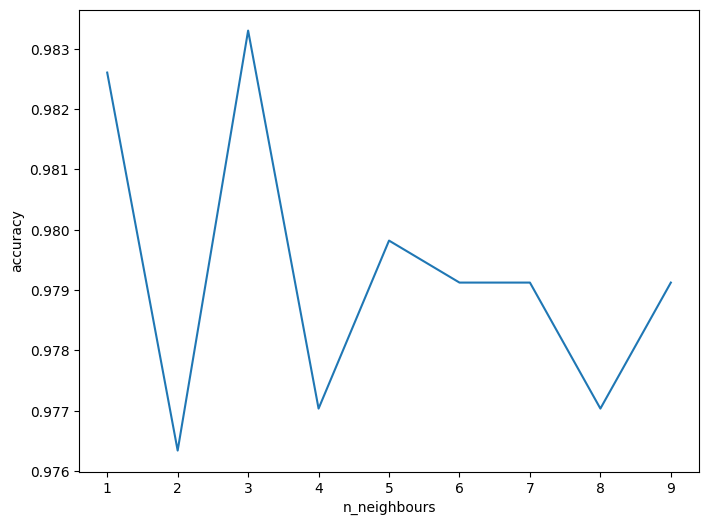

In [ ]:
# plot the relationship between K and testing accuracy
plt.figure(figsize=(8,6))
plt.plot(range(1,10),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))

In [ ]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.97      0.97        35
           2       1.00      0.97      0.99        36
           3       0.91      1.00      0.95        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.90      0.95        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



##svm

In [ ]:
classifier = svm.LinearSVC (random_state=51)

In [ ]:
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
classifier.score(x_test,y_test)

0.9388888888888889

In [ ]:
print(classifier.score(x_test,y_test))
print(f1_score(y_test,classifier.predict(x_test),average='macro'))

0.9388888888888889
0.9404019012518763


Text(0, 0.5, 'Prediction Accuracy')

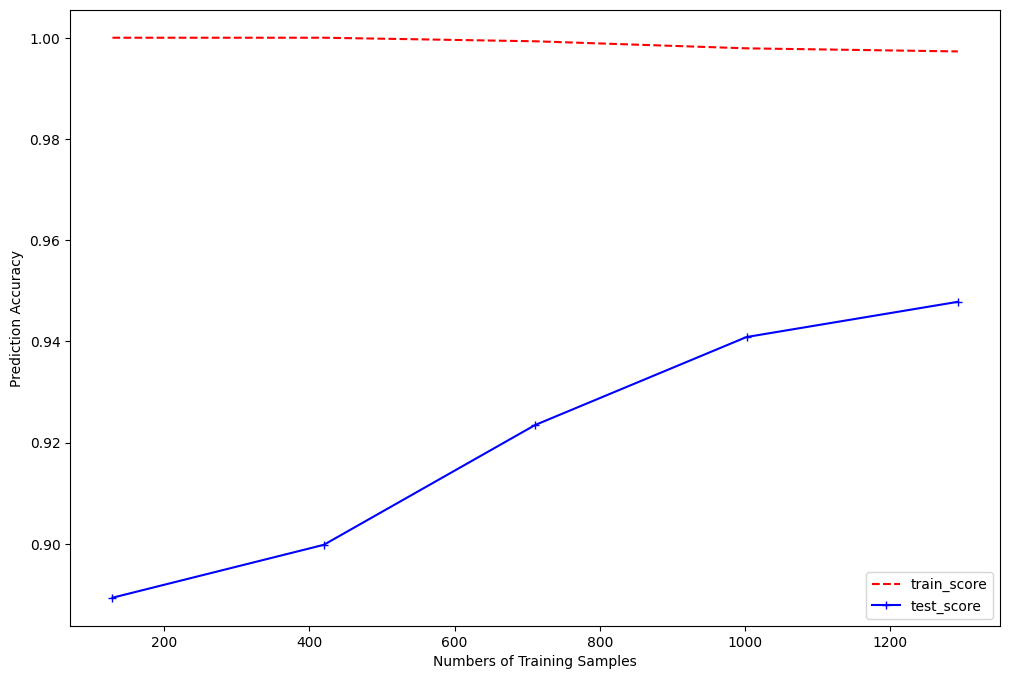

In [ ]:
lc=learning_curve(classifier,x_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score, "r--" ,label="train_score")
plt.plot(size,test_score,"b+-" , label="test_score")
plt.legend(loc="best")
plt.xlabel("Numbers of Training Samples")
plt.ylabel("Prediction Accuracy")

In [ ]:
curve

(array([[0.97998259, 0.97998259, 0.97478261, 0.98      , 0.97913043],
        [0.97302002, 0.97127937, 0.96434783, 0.97043478, 0.96608696],
        [0.96518712, 0.97040905, 0.9626087 , 0.96434783, 0.96173913],
        [0.94691036, 0.93733681, 0.93565217, 0.94434783, 0.93478261],
        [0.91122715, 0.90774587, 0.90347826, 0.91217391, 0.90695652]]),
 array([[0.97569444, 0.97569444, 0.98954704, 0.96515679, 0.9825784 ],
        [0.95833333, 0.96527778, 0.97560976, 0.96167247, 0.97909408],
        [0.95138889, 0.96527778, 0.97212544, 0.95470383, 0.97560976],
        [0.91666667, 0.94444444, 0.95818815, 0.91289199, 0.96515679],
        [0.89583333, 0.90277778, 0.92334495, 0.88501742, 0.91637631]]))

Text(0, 0.5, 'Performance metric')

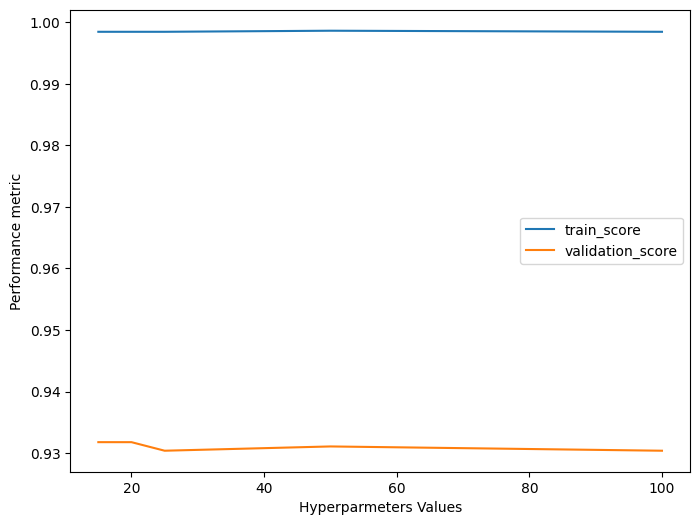

In [ ]:
param_range=[15,20,25,50,100]
curve=validation_curve(classifier,x_train,y_train,cv=5,param_name='C',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score, label="train_score")
plt.plot(param_range,test_score, label="validation_score")
plt.legend(loc="best")
plt.xticks=param_range
plt.xlabel("Hyperparmeters Values")
plt.ylabel("Performance metric")

In [ ]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.84      0.89      0.86        35
           2       0.97      0.89      0.93        36
           3       0.85      1.00      0.92        29
           4       0.97      1.00      0.98        30
           5       0.97      0.93      0.95        40
           6       0.96      0.98      0.97        44
           7       1.00      0.95      0.97        39
           8       0.90      0.90      0.90        39
           9       0.95      0.90      0.93        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

